# TextCL Tutorial

1. [Introduction](#Introduction)
2. [Preparation](#Preparation)
3. [Filtering on language](#Filtering-on-language)
4. [Filtering on Jaccard similarity](#Filtering-on-Jaccard-similarity)
5. [Filtering on perplexity score](#Filtering-on-perplexity-score)
6. [Outliers filtering](#Outliers-filtering)
7. [Plots for outlier detection](#Plots-for-outlier-detection)

## Introduction

This tutorial demonstrates how to preprocess text to clean it up for the modeling. Usually, this analysis is performed manually and very time-consuming. Package helps to identify and filter different languages in some sentences of the text, not linguistically connected and corrupted sentences, and duplicated sentences.

Another feature of the package is to identify and filter outliers of the text scope. As outliers, we consider texts that don't belong contextually to the main topic of the text. It's important to be able to identify these anomalies without having labeled data, so we can have a general algorithm for the unstructured texts and find out the scope blocks.

In the tutorial, we will work with BBC data set and manually generated extra sentences to show all functions of the package. Overall package can be used with any text data set loaded as a Pandas data frame.

The following functions were implemented for the text cleaning:

1. Filtering on language
2. Filtering on Jaccard similarity
3. Filtering on perplexity score
4. Outliers filtering

The first three functions are working on the sentence level for each text in the scope and the outlier filtering function works on the full-text level. In the function were implemented 3 different outlier detection algorithms: [TONMF](https://arxiv.org/pdf/1701.01325.pdf), [RPCA](https://github.com/dganguli/robust-pca), [SVD](https://api.semanticscholar.org/CorpusID:123532178) with `l2` normalisation by default (can be change to the `l1`, `l2`, or `max` with `norm` parameter).

## Preparation

Load package and dependencies

In [1]:
import textcl
import pandas as pd

Prepare input data from modified BBC dataset. First, you need to load the text data for the processing. Sample file places in the example folder of the project next to this tutorial. 

In [2]:
SOURCE_FILE_PATH = 'prepared_bbc_dataset.csv'

input_texts_df = pd.read_csv(SOURCE_FILE_PATH).reset_index()
print("Num texts in the data set: {}".format(len(input_texts_df)))

Num texts in the data set: 21


It's necessary to have column `text` in the data (default name). If you don't have `text` column you will need to specify the name for [`split_into_sentences()`](https://alinapetukhova.github.io/textcl/docs/preprocessing.html#textcl.preprocessing.split_into_sentences) function using `text_col` parameter. Source file from this example structured as follows:

In [3]:
input_texts_df.columns

Index(['index', 'topic_name', 'text'], dtype='object')

In this example we will use a subset of BBC News data set containing 5 topics (business, entertainment, politics, sport, tech)  with manually inserted texts to display the capabilities of the package (see examples below). Here is how the dataset looks like:

In [4]:
input_texts_df

,index,topic_name,text
0,0,business,WorldCom bosses' $54m payout Ten former direc...
1,1,business,Profits slide at India's Dr Reddy Profits at ...
2,2,business,Liberian economy starts to grow The Liberian ...
3,3,business,"Uluslararası Para Fonu (IMF), Liberya ekonomis..."
4,4,entertainment,Singer Ian Brown 'in gig arrest' Former Stone...
5,5,entertainment,Blue beat U2 to top France honour Irish band ...
6,6,entertainment,Housewives lift Channel 4 ratings The debut o...
7,7,entertainment,Домохозяйки подняли рейтинги канала 4 Дебют ам...
8,8,entertainment,Housewives Channel 4 reytinglerini yükseltti A...
9,9,politics,Observers to monitor UK election Ministers wi...


## Split texts into sentences

To be able to process/filter sentences from the data set separately we first need to split given text into the sentences as rows in Pandas dataframe.

If `sentence_col` is not specified as a parameter, created sentences will be saved in the `sentence` column.|

In [5]:
split_input_texts_df = textcl.split_into_sentences(input_texts_df)
print("Num sentences before filtering: {}".format(len(split_input_texts_df)))

Num sentences before filtering: 319


Arter the splitting text data set into sentences, the amount of rows increased from 21 to 319. Let's review them:

In [6]:
split_input_texts_df.head()

,index,topic_name,text,sentence
0,0,business,WorldCom bosses' $54m payout Ten former direc...,WorldCom bosses' $54m payout Ten former direc...
1,0,business,WorldCom bosses' $54m payout Ten former direc...,"James Wareham, a lawyer representing one of t..."
2,0,business,WorldCom bosses' $54m payout Ten former direc...,The remaining $36m will be paid by the directo...
3,0,business,WorldCom bosses' $54m payout Ten former direc...,"But, a spokesman for the prosecutor, New York ..."
4,0,business,WorldCom bosses' $54m payout Ten former direc...,Corporate governance experts said that if the...


## Filtering on language

Let's, check that the textcl is working by testing the language filtering algorithm with manually inserted texts in Russian and Turkish language to the initial set.

To do that we will use function [`language_filtering()`](https://alinapetukhova.github.io/textcl/docs/preprocessing.html#textcl.preprocessing.language_filtering), that can filter sentences by the language. Inputs to this function should be Pandas dataframe with sentence column, threshold value, and target language. Language score is the threshold used for filtering with the default value of 0.99. In the function was used the `detect_language` function from the package `langdetect`, that returns probabilities of text belonging to a certain language. All sentences below threshold will be filtered.

In [7]:
split_input_texts_df = textcl.language_filtering(split_input_texts_df, threshold=0.99, language='en')
print("Num sentences after language filtering: {}".format(len(split_input_texts_df)))

Num sentences after language filtering: 280


The amount of rows with sentences was reduced from 319 to 281. Join sentences to the initial texts to review the results:

In [8]:
textcl.join_sentences_by_label(split_input_texts_df, label_col = 'index')

,index,sentence
0,0,WorldCom bosses' $54m payout Ten former direc...
1,1,Profits slide at India's Dr Reddy Profits at ...
2,2,Liberian economy starts to grow The Liberian ...
3,4,Singer Ian Brown 'in gig arrest' Former Stone...
4,5,Blue beat U2 to top France honour Irish band ...
5,6,Housewives lift Channel 4 ratings The debut o...
6,9,Observers to monitor UK election Ministers wi...
7,10,Lib Dems highlight problem debt People vulner...
8,11,Minister defends hunting ban law The law bann...
9,12,Legendary Dutch boss Michels dies Legendary D...


As we can see texts with index 3 (Turkish), 7 (Russian), 8 (Turkish) were removed.

## Filtering on Jaccard similarity

Function [`jaccard_sim_filtering()`](https://alinapetukhova.github.io/textcl/docs/preprocessing.html#textcl.preprocessing.jaccard_sim_filtering) used to filter sentences by Jaccard similarity. It represents each sentence as an array of tokens and finds the intersection between two arrays. Using the intersection calculated the similarity score and if it's below the given threshold sentence will be filtered.

In [9]:
split_input_texts_df = textcl.jaccard_sim_filtering(split_input_texts_df, threshold=0.8)
print("Num sentences after Jaccard sim filtering: {}".format(len(split_input_texts_df)))

Num sentences after Jaccard sim filtering: 257


The amount of rows with sentences was reduced from 281 to 258. Join sentences to the initial texts to review the results:

In [10]:
textcl.join_sentences_by_label(split_input_texts_df, label_col = 'index')

,index,sentence
0,0,WorldCom bosses' $54m payout Ten former direc...
1,1,Profits slide at India's Dr Reddy Profits at ...
2,2,Liberian economy starts to grow The Liberian ...
3,4,Singer Ian Brown 'in gig arrest' Former Stone...
4,5,Blue beat U2 to top France honour Irish band ...
5,6,Housewives lift Channel 4 ratings The debut o...
6,9,Observers to monitor UK election Ministers wi...
7,10,Lib Dems highlight problem debt People vulner...
8,11,Minister defends hunting ban law The law bann...
9,12,Legendary Dutch boss Michels dies Legendary D...


Text with id=17 was removed as it partially duplicates text with id=18.

## Filtering on perplexity score

Function [`perplexity_filtering()`](https://alinapetukhova.github.io/textcl/docs/preprocessing.html#textcl.preprocessing.perplexity_filtering) used to filter sentences by perplexity. The first step creates contextual tokens to capture latent syntactic-semantic information provided by the package `pytorch_pretrained_bert` with pretrained `openai-gpt` tokenizer and use GPT as Language Model with `OpenAIGPTLMHeadModel`. Perplexity calculated as `exp(loss)` (where **loss** is language modeling loss of a particular token).

In [11]:
split_input_texts_df = textcl.perplexity_filtering(split_input_texts_df, threshold=1000)
print("Num sentences after perplexity filtering: {}".format(len(split_input_texts_df)))

ftfy or spacy is not installed using BERT BasicTokenizer instead of SpaCy & ftfy.


Num sentences after perplexity filtering: 246


The amount of rows with sentences was resuced from 258 to the 246. Join sentences to the initial texts to review the results:

In [12]:
textcl.join_sentences_by_label(split_input_texts_df, label_col = 'index')

,index,sentence
0,0,WorldCom bosses' $54m payout Ten former direc...
1,1,Profits slide at India's Dr Reddy Profits at ...
2,2,Liberian economy starts to grow The Liberian ...
3,4,Singer Ian Brown 'in gig arrest' Former Stone...
4,5,Blue beat U2 to top France honour Irish band ...
5,6,Housewives lift Channel 4 ratings The debut o...
6,9,Observers to monitor UK election Ministers wi...
7,10,Lib Dems highlight problem debt People vulner...
8,11,Minister defends hunting ban law The law bann...
9,12,Legendary Dutch boss Michels dies Legendary D...


Text with id=19 was removed because sentence `data clear additional 78.0 long-term 43 those)` is not linguistically correct.

## Outliers filtering

Text data is uniquely challenging to outlier detection because of its sparsity and high dimensional nature. We extend the fact that NMF is similar to pLSI and LDA generative models.

The function [`outlier_detection()`](https://alinapetukhova.github.io/textcl/docs/outliers_detection.html#textcl.outliers_detection.outlier_detection) used to detect outliers in a list of sentences based on the contextual information using the unsupervised methods. Text embeddings were created as a bag of words as an input for the algorithms. Input parameters - Pandas data frames with texts, method to use for outlier detection, norm to normalize the obtained matrix and detect the abnormal texts.

Join sentences to the text after filtering and select category **tech**. In this category was manually inserted an outlier with person profile instead of tech text

In [13]:
joined_texts = split_input_texts_df[["index", "text", "topic_name"]].drop_duplicates()
joined_texts = joined_texts[joined_texts.topic_name == 'tech']

In [14]:
print("Num sentences before outliers filtering: {}".format(len(joined_texts)))

Num sentences before outliers filtering: 4


Let's run outlier_detection function with `rpca` algorithm:

In [15]:
joined_texts, _ = textcl.outlier_detection(joined_texts, method='rpca', Z_threshold=1.0)
print("Num sentences after outliers filtering: {}".format(len(joined_texts)))

Num sentences after outliers filtering: 3


[nltk_data] Downloading package stopwords to /home/alina/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


The function produces the following output:

In [16]:
joined_texts

,index,text,topic_name,words,Z_score
167,15,Mobile games come of age The BBC News website...,tech,Mobile games come age BBC News website takes l...,0.954468
211,16,PlayStation 3 processor unveiled The Cell pro...,tech,PlayStation 3 processor unveiled Cell processo...,0.431154
232,18,PC photo printers challenge pros Home printed...,tech,PC photo printers challenge pros Home printed ...,0.292867


Text with id=20 was removed because it describes a person profile instead of tech news.


## Plots for outlier detection

In this block of tutorial we will visualize the outliers for the BBC data set obtained with the different algorithms. First load additional libraries for the result visualization:

In [17]:
import os
from sklearn.feature_extraction.text import CountVectorizer
import random
from nltk.corpus import stopwords
from sklearn import preprocessing
import matplotlib.pyplot as plt
from sklearn import metrics
import numpy as np

We will use NLTK library to filter stop words from the initial dataset. Let's download this extension:

In [18]:
import nltk
# nltk.download('stopwords')

### Prepare input data from the BBC dataset

To demonstrate the capacity of the package for the outlier detection task, we present a simplified example from a real world data set, to show how skewed the typical values of the corresponding column z(x) may be in real scenarios. To build plots for the outlier detection functions you need to load full BBC dataset and apply initial trivial text cleaning:

In [19]:
dataset_path = "./datasets/bbc" # http://mlg.ucd.ie/files/datasets/bbc-fulltext.zip
bbc_dataset = pd.DataFrame([], columns = ['class_name', 'text'])

list_topic_folders = os.listdir("{}/".format(dataset_path))
for topic_folder in list_topic_folders:
    if "txt" not in topic_folder.lower():
        list_of_files = os.listdir("{}/{}".format(dataset_path, topic_folder))
        for file in list_of_files:
            if file.find(".txt") != -1 and file.find("ipynb") == -1:
                with open("{}/{}/{}".format(dataset_path, topic_folder, file), 'rb') as f:
                    text = f.read()
                text = text.decode('windows-1252').replace('\n', ' ')
                bbc_dataset = bbc_dataset.append(pd.DataFrame([[topic_folder, text]], columns = ['class_name', 'text']))
bbc_dataset = bbc_dataset.reset_index(drop=True)
bbc_dataset.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1872 entries, 0 to 1871
Columns: 2 entries, class_name to text
dtypes: object(2)
memory usage: 29.4+ KB


Data set contains 1872 texts from different categories:

In [20]:
bbc_dataset['class_name'].unique()

array(['entertainment', 'politics', 'business', 'sport', 'tech'],
      dtype=object)

Get data for business and politics classes to form the core of the data set:

In [21]:
bus_and_pol = bbc_dataset[(bbc_dataset['class_name'] == "business") | (bbc_dataset['class_name'] == "politics")]
df_bus_and_pol_texts = pd.DataFrame(list(bus_and_pol.text.values), columns=['text'])
df_bus_and_pol_texts['y_true'] = 0

Get 50 random outliers documents from tech class:

In [22]:
text_for_outliers = bbc_dataset[bbc_dataset['class_name'] == "tech"]

random.seed(1)
text_for_outliers = text_for_outliers.iloc[random.sample(range(0, len(text_for_outliers)), 50)]
df_outliers = pd.DataFrame(list(text_for_outliers.text.values), columns=['text'])
df_outliers['y_true'] = 1

Add outliers documents to the core data set and shuffle:

In [23]:
df_test = pd.concat([df_bus_and_pol_texts, df_outliers])
df_test = df_test.sample(frac=1).reset_index(drop=True)

stop = stopwords.words('english')

df_test['text'] = df_test['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
df_test

,text,y_true
0,Dollar hovers around record lows The US dollar...,0
1,Jobs go Oracle takeover Oracle announced cutti...,0
2,BNP leader Nick Griffin arrested The leader Br...,0
3,Bank holds interest rate 4.75% The Bank Englan...,0
4,Labour's Cunningham stand Veteran Labour MP fo...,0
...,...,...
972,China's Shanda buys stake Sina Chinese online ...,0
973,Parties build poll war chests The Labour Party...,0
974,"Retirement age could scrapped The ""myth ageing...",0
975,David Blunkett quotes David Blunkett - resigne...,0


Convert texts to the bag of words using `CountVectorizer`:

In [24]:
vectorizer = CountVectorizer()
bag_of_words = vectorizer.fit_transform(df_test['text']).todense()

Note: `CountVectorizer` used as an example, you can experiment and use other tokenizers or word embeddings here.

## TONMF

The function [`tonmf()`](https://alinapetukhova.github.io/textcl/docs/outliers_detection.html#textcl.outliers_detection.tonmf) to use TONMF algorithm to get the outlier\_matrix. Solution is based on the non-negative matrix factorization with the extension of the block coordinate descent framework.

In [25]:
outlier_matrix,_,_,_ = textcl.tonmf(bag_of_words, k=10, alpha=10, beta=0.05)

Normalize with l2-normalization

In [26]:
_, y_pred = preprocessing.normalize(outlier_matrix, axis = 1, norm = 'l2', return_norm = True)

Use ROC curve to plot the results of the algorithm:

Text(0.5, 1.0, 'BBC dataset TONMF ROC-curve. K=3, alpha = 1, beta = 0.5')

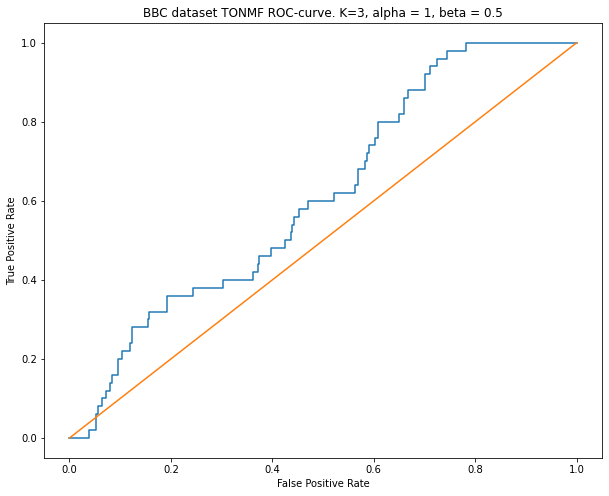

In [27]:
f = plt.figure(figsize=(10, 8))
fpr, tpr, thresholds = metrics.roc_curve(list(df_test['y_true'].values), y_pred, pos_label=1)
plt.plot(fpr, tpr, label='ROC curve')
plt.plot([0, 1], [0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
f.savefig("BBC dataset TONMF ROC-curve. K=3, alpha = 1, beta = 0.5.pdf", bbox_inches='tight')
plt.title('BBC dataset TONMF ROC-curve. K=3, alpha = 1, beta = 0.5')

Display ℓ2 norm of columns of Z outlier matrix:

Text(0.5, 1.0, 'Results of TONMF+L2 (outliers - red, non-outliers - blue)')

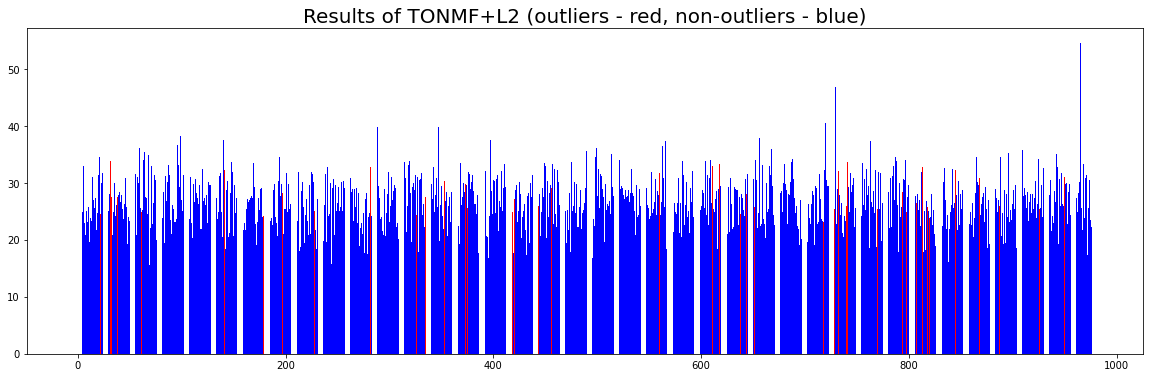

In [28]:
colors_array = np.array(list(df_test['y_true'].values)).astype('str')
colors_array[colors_array == '1'] = 'r'
colors_array[colors_array != 'r'] = 'b'

f = plt.figure(figsize=(20, 6))
index = range(0, len(y_pred))
plt.bar(index, y_pred, color = colors_array)
f.savefig("Results of TONMF+L2 (outliers - red, non-outliers - blue).pdf", bbox_inches='tight')
plt.title("Results of TONMF+L2 (outliers - red, non-outliers - blue)", size = 20)

## RPCA

Function [`rpca_implementation()`](https://alinapetukhova.github.io/textcl/docs/outliers_detection.html#textcl.outliers_detection.rpca_implementation) to use Robust Principal Component Analysis (RPCA) to get the outlier\_matrix. RPCA uses low rank approximation and yields two matrices: low rank matrix $L$ and a sparse matrix $S$. After normalization, the $S$ matrix represents the outlier score for the document.

In [29]:
outlier_matrix = textcl.rpca_implementation(bag_of_words)

Normalize with l2-normalization

Text(0.5, 1.0, 'BBC dataset RPCA ROC-curve')

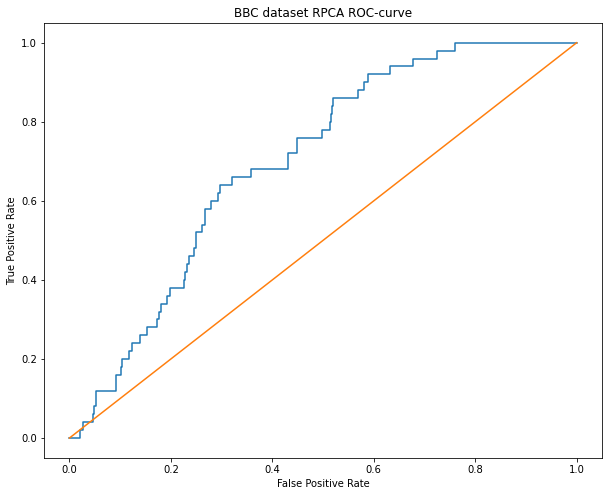

In [30]:
_, y_pred = preprocessing.normalize(outlier_matrix, axis = 1, norm = 'l2', return_norm = True)

f = plt.figure(figsize=(10, 8))
fpr, tpr, thresholds = metrics.roc_curve(list(df_test['y_true'].values), y_pred, pos_label=1)
plt.plot(fpr, tpr, label='ROC curve')
plt.plot([0, 1], [0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
f.savefig("BBC dataset RPCA ROC-curve.pdf", bbox_inches='tight')
plt.title('BBC dataset RPCA ROC-curve')

Display ℓ2 norm of columns of Z outlier matrix

Text(0.5, 1.0, 'Results of RPCA+L2 (outliers - red, non-outliers - blue)')

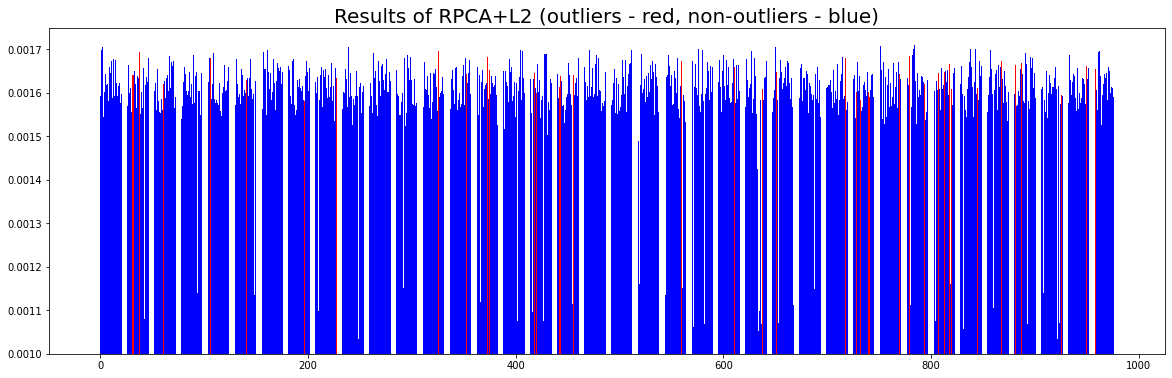

In [31]:
colors_array = np.array(list(df_test['y_true'].values)).astype('str')
colors_array[colors_array == '1'] = 'r'
colors_array[colors_array != 'r'] = 'b'

f = plt.figure(figsize=(20, 6))
plt.ylim(0.001, 0.00175)
index = range(0, len(y_pred))
plt.bar(index, y_pred, color = colors_array)
f.savefig("Results of RPCA+L2 (outliers - red, non-outliers - blue).pdf", bbox_inches='tight')
plt.title("Results of RPCA+L2 (outliers - red, non-outliers - blue)", size = 20)

## SVD

Function [`svd()`](https://alinapetukhova.github.io/textcl/docs/outliers_detection.html#textcl.outliers_detection.svd) to use singular value decomposition (SVD) to get the outlier_matrix. SVD function used from `np.linalg` and outlier matrix is presented as multiplication of square root of diagonal elements of the rectangular diagonal matrix $S$ and complex unitary matrix

In [32]:
outlier_matrix = textcl.svd(bag_of_words)

Normalize with l2-normalization

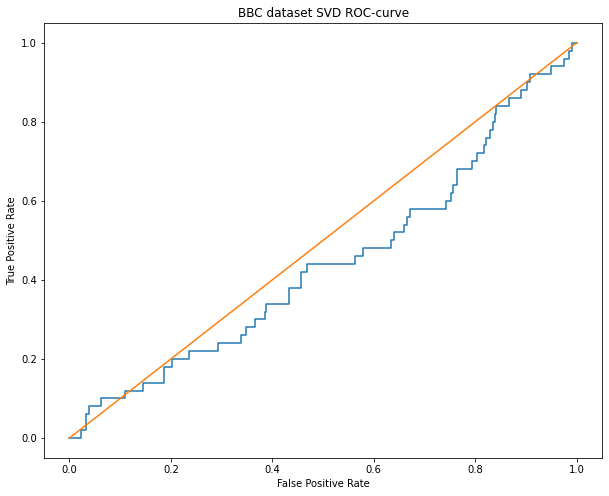

In [33]:
_, y_pred = preprocessing.normalize(outlier_matrix, axis = 1, norm = 'l2', return_norm = True)

f = plt.figure(figsize=(10, 8))
fpr, tpr, thresholds = metrics.roc_curve(list(df_test['y_true'].values), y_pred, pos_label=1)
plt.plot(fpr, tpr, label='ROC curve')
plt.plot([0, 1], [0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('BBC dataset SVD ROC-curve')
f.savefig("BBC dataset SVD ROC-curve.pdf", bbox_inches='tight')

Display ℓ2 norm of columns of Z outlier matrix

Text(0.5, 1.0, 'Results of SVD+L2 (outliers - red, non-outliers - blue)')

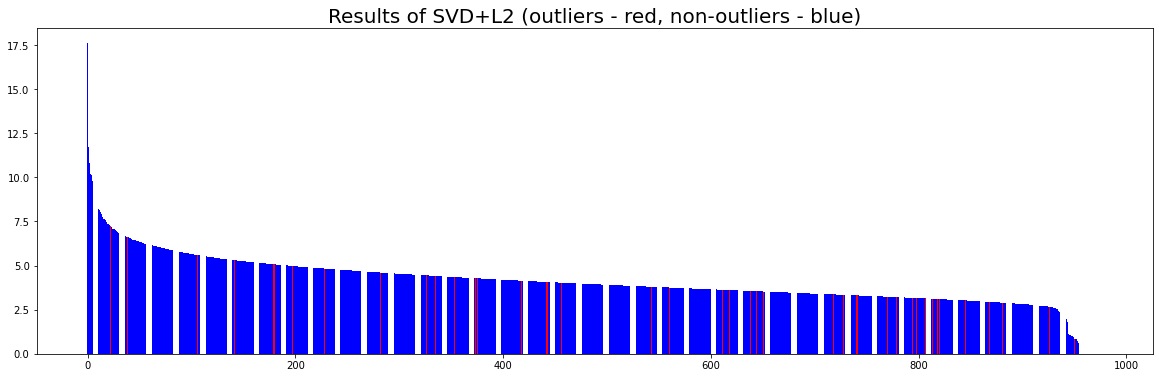

In [34]:
colors_array = np.array(list(df_test['y_true'].values)).astype('str')
colors_array[colors_array == '1'] = 'r'
colors_array[colors_array != 'r'] = 'b'

f = plt.figure(figsize=(20, 6))
# plt.ylim(0.001, 0.00175)
index = range(0, len(y_pred))
plt.bar(index, y_pred, color = colors_array)
f.savefig("Results of SVD+L2 (outliers - red, non-outliers - blue).pdf", bbox_inches='tight')
plt.title("Results of SVD+L2 (outliers - red, non-outliers - blue)", size = 20)